### load dependecies

In [1]:
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)
import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### create small dataset

In [2]:
xs = np.linspace(0., 8, 10000000) # feature (independent variable)
ys = 0.3 * xs - 0.8 + np.random.normal(scale=0.25, size=len(xs)) # labels (dependent variable)

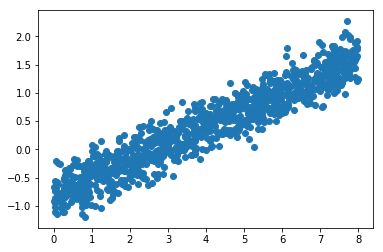

In [3]:
fig, ax = plt.subplots()
data_subset = pd.DataFrame(list(zip(xs, ys)), columns=['x', 'y']).sample(n=1000)
_ = ax.scatter(data_subset.x, data_subset.y)

In [4]:
m = tf.Variable(-0.5)
b = tf.Variable(1.0)

In [5]:
batch_size = 8

In [6]:
xs_placeholder = tf.placeholder(tf.float32, [batch_size])
ys_placeholder = tf.placeholder(tf.float32, [batch_size])

### cost function

In [7]:
total_error = 0

In [8]:
ys_model = m * xs_placeholder + b
total_error += tf.reduce_sum((ys_placeholder - ys_model)**2)

### optimizer

In [9]:
optimizer_op = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(total_error)

### initializer

In [10]:
initializer_op = tf.global_variables_initializer()

### execute session

In [11]:
with tf.Session() as session:
    session.run(initializer_op)
    
    n_batches = 1000
    for i in range(n_batches):
        random_indices = np.random.randint(len(xs), size=batch_size)
        feed = {
            xs_placeholder: xs[random_indices],
            ys_placeholder: ys[random_indices]
        }
        session.run(optimizer_op, feed_dict=feed)
    slope, intercept = session.run([m, b])

In [12]:
slope

0.29386783

In [13]:
intercept

-0.76844597

In [14]:
y_hat = intercept + slope * np.array(xs)

In [15]:
pd.DataFrame(list(zip(ys, y_hat)), columns=['y', 'y_hat'])

,y,y_hat
0,-0.675821,-0.768446
1,-0.834566,-0.768446
2,-0.638077,-0.768445
3,-0.419242,-0.768445
4,-0.858537,-0.768445
5,-0.858533,-0.768445
6,-0.405195,-0.768445
7,-0.608140,-0.768444
8,-0.917367,-0.768444
9,-0.664358,-0.768444


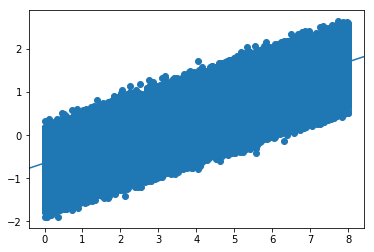

In [16]:
fig, ax = plt.subplots()

ax.scatter(xs, ys)
x_min, x_max = ax.get_xlim()
y_min, y_max = intercept, intercept + slope * (x_max - x_min)

ax.plot([x_min, x_max], [y_min, y_max])
_ = ax.set_xlim([x_min, x_max])